In [12]:
import urllib3
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
#import plotly.express as px

In [2]:
#url = "https://covid19-static.cdn-apple.com/covid19-mobility-data/2008HotfixDev29/v2/en-us/applemobilitytrends-2020-05-16.csv"
#url ="https://covid19-static.cdn-apple.com/covid19-mobility-data/2008HotfixDev35/v2/en-us/applemobilitytrends-2020-05-18.csv"
#url = "https://covid19-static.cdn-apple.com/covid19-mobility-data/2008HotfixDev35/v3/en-us/applemobilitytrends-2020-05-18.csv"
url = "https://covid19-static.cdn-apple.com/covid19-mobility-data/2008HotfixDev42/v3/en-us/applemobilitytrends-2020-05-24.csv"

r = requests.get(url)
url_content = r.content
csv_file = open('downloaded.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [3]:
file_folder = '/Users/rosleeb/ny_thruway'
data = pd.read_csv(f'{file_folder}/downloaded.csv')

In [4]:
data.head(5)

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,48.30,46.78,45.51,56.09,51.12,59.04,61.14,65.34,56.11,53.39
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,54.41,48.36,45.20,67.46,63.20,66.57,67.97,68.49,48.02,42.56
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,44.34,38.29,22.01,40.01,41.34,41.53,41.52,47.52,41.34,23.81
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,31.63,28.81,18.49,30.79,30.37,28.85,29.04,31.99,31.40,16.83
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,79.75,65.88,72.17,73.58,75.83,76.35,81.42,82.51,65.78,74.12


In [5]:
data["Map"] = data["region"] + "_" + data["transportation_type"]
data = data.drop(['geo_type','alternative_name','region','transportation_type', 'sub-region', "country"], axis=1)
maps = data['Map']
data.drop(labels=['Map'], axis=1,inplace = True)
data.insert(0, 'Map', maps)
data = data.set_index('Map')
data.head()

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24
Map,,,,,,,,,,,,,,,,,,,,,
Albania_driving,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,...,48.30,46.78,45.51,56.09,51.12,59.04,61.14,65.34,56.11,53.39
Albania_walking,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,...,54.41,48.36,45.20,67.46,63.20,66.57,67.97,68.49,48.02,42.56
Argentina_driving,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,...,44.34,38.29,22.01,40.01,41.34,41.53,41.52,47.52,41.34,23.81
Argentina_walking,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,...,31.63,28.81,18.49,30.79,30.37,28.85,29.04,31.99,31.40,16.83
Australia_driving,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,...,79.75,65.88,72.17,73.58,75.83,76.35,81.42,82.51,65.78,74.12


In [6]:
data = pd.DataFrame(data.T)

In [7]:
data.head()

Map,Albania_driving,Albania_walking,Argentina_driving,Argentina_walking,Australia_driving,Australia_transit,Australia_walking,Austria_driving,Austria_walking,Belgium_driving,...,Yoakum County_driving,Yolo County_driving,York County_driving,York County_driving,York County_driving,York County_driving,York County_driving,Young County_driving,Yuba County_driving,Yuma County_driving
2020-01-13,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2020-01-14,95.30,100.68,97.07,95.11,102.98,101.78,101.31,101.14,101.55,101.19,...,111.01,100.24,100.76,103.69,100.45,100.96,103.05,98.85,102.98,101.82
2020-01-15,101.43,98.93,102.45,101.37,104.21,100.64,101.82,104.24,105.59,107.49,...,103.92,107.65,103.61,106.16,94.25,111.03,103.98,97.76,103.10,106.67
2020-01-16,97.20,98.46,111.21,112.67,108.63,99.58,104.52,112.21,112.24,107.67,...,100.26,105.90,109.78,106.82,131.84,111.97,82.24,92.21,114.08,108.93
2020-01-17,103.55,100.85,118.45,116.72,109.08,98.34,113.73,117.23,123.36,117.38,...,112.71,148.56,128.91,125.72,95.98,136.50,129.29,115.79,118.83,135.92


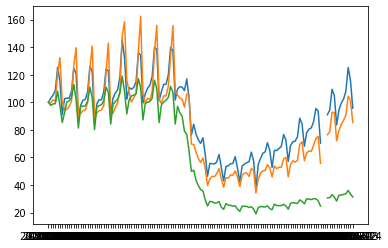

In [8]:
plt.plot(data['United States_driving'])
plt.plot(data['United States_walking'])
plt.plot(data['United States_transit'])
plt.show()

In [9]:
states = ['Alabama_driving', 'Alaska_driving', 'Arizona_driving', 'Arkansas_driving', 
          'California_driving', 'Colorado_driving', 'Connecticut_driving', 'Delaware_driving',
         'Florida_driving', 'Georgia_driving', 'Hawaii_driving', 'Idaho_driving', 'Illinois_driving',
         'Indiana_driving','Iowa_driving', 'Kansas_driving', 'Kentucky_driving', 'Louisiana_driving',
         'Maine_driving', 'Maryland_driving', 'Massachusetts_driving', 'Michigan_driving', 'Minnesota_driving',
         'Mississippi_driving', 'Missouri_driving', 'Montana_driving', 'Nebraska_driving', 'Nevada_driving',
         'New Hampshire_driving', 'New Jersey_driving', 'New Mexico_driving', 'New York_driving', 'North Dakota_driving',
         'North Carolina_driving', 'Ohio_driving', 'Oklahoma_driving', 'Oregon_driving', 'Pennsylvania_driving',
         'Rhode Island_driving', 'South Carolina_driving', 'South Dakota_driving', 'Tennessee_driving',
         'Texas_driving', 'Utah_driving', 'Vermont_driving', 'Virginia_driving', 'Washington_driving',
         'West Virginia_driving', 'Wisconsin_driving', 'Wyoming_driving']

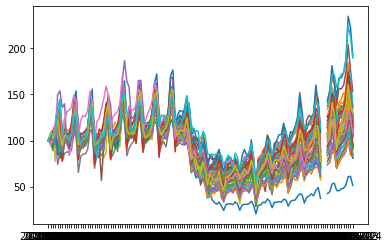

In [10]:
for i in range(len(states)):
    plt.plot(data[states[i]])    
plt.show()